# **Perceptron: The Building Block of Neural Networks**

## Introduction
In this notebook, we'll learn about the perceptron, which is the simplest form of a neural network. It's like the "atom" of deep learning!

## What is a Perceptron?
A perceptron is a simple algorithm that takes several inputs, processes them, and produces a single output. It was developed in the late 1950s by Frank Rosenblatt.

### Basic Structure
* Inputs (x1, x2, ..., xn)
* Weights (w1, w2, ..., wn)
* Bias (b)
* Activation function

### How it Works
1. Multiply each input by its weight
2. Sum all these products
3. Add the bias
4. Apply an activation function to determine the output

Let's visualize this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Implementing a Basic Perceptron from Scratch


In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                y_predicted = self.activation_function(np.dot(x_i, self.weights) + self.bias)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        y_predicted = []
        for x_i in X:
            y_hat = self.activation_function(np.dot(x_i, self.weights) + self.bias)
            y_predicted.append(y_hat)
        return np.array(y_predicted)

## Testing the Perceptron on Simple Logic Gates

### AND Gate

In [4]:
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
perceptron_and = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron_and.fit(X_and, y_and)
print("AND Gate:")
print("Learned weights:", perceptron_and.weights)
print("Learned bias:", perceptron_and.bias)
print("Predictions:", perceptron_and.predict(X_and))
print("Expected:", y_and)


AND Gate:
Learned weights: [0.2 0.1]
Learned bias: -0.20000000000000004
Predictions: [0 0 0 1]
Expected: [0 0 0 1]


OR Gate

In [5]:
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
perceptron_or = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron_or.fit(X_or, y_or)
print("\nOR Gate:")
print("Learned weights:", perceptron_or.weights)
print("Learned bias:", perceptron_or.bias)
print("Predictions:", perceptron_or.predict(X_or))
print("Expected:", y_or)



OR Gate:
Learned weights: [0.1 0.1]
Learned bias: -0.1
Predictions: [0 1 1 1]
Expected: [0 1 1 1]


XOR Gate

In [6]:
#  dataset for XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Train the perceptron
perceptron_xor = Perceptron(learning_rate=0.1, n_iterations=1000)
perceptron_xor.fit(X_xor, y_xor)

# Print results
print("\nXOR Gate:")
print("Learned weights:", perceptron_xor.weights)
print("Learned bias:", perceptron_xor.bias)
print("Predictions:", perceptron_xor.predict(X_xor))
print("Expected:", y_xor)




XOR Gate:
Learned weights: [-0.1  0. ]
Learned bias: 0.0
Predictions: [1 1 0 0]
Expected: [0 1 1 0]


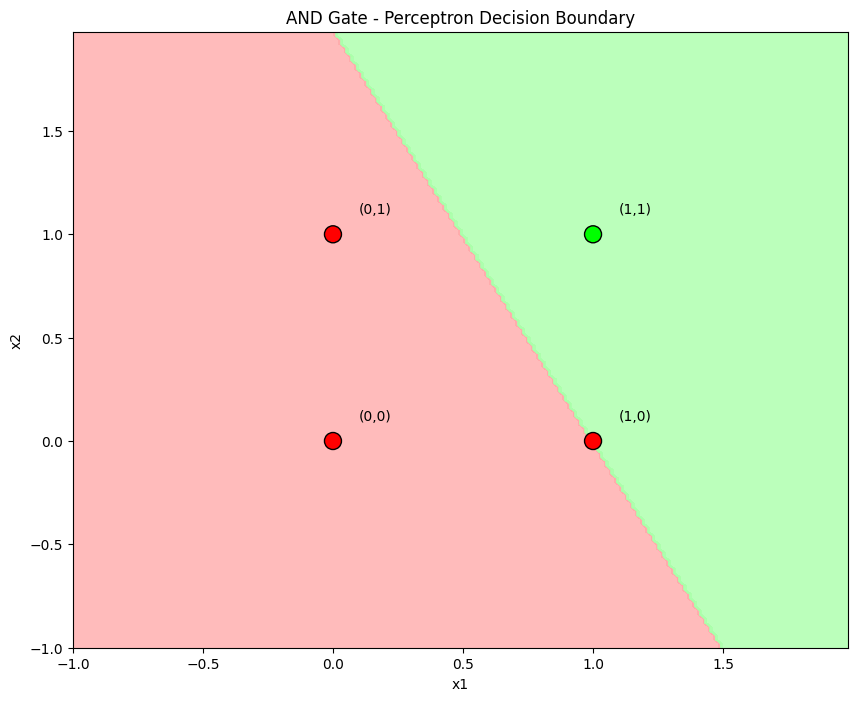

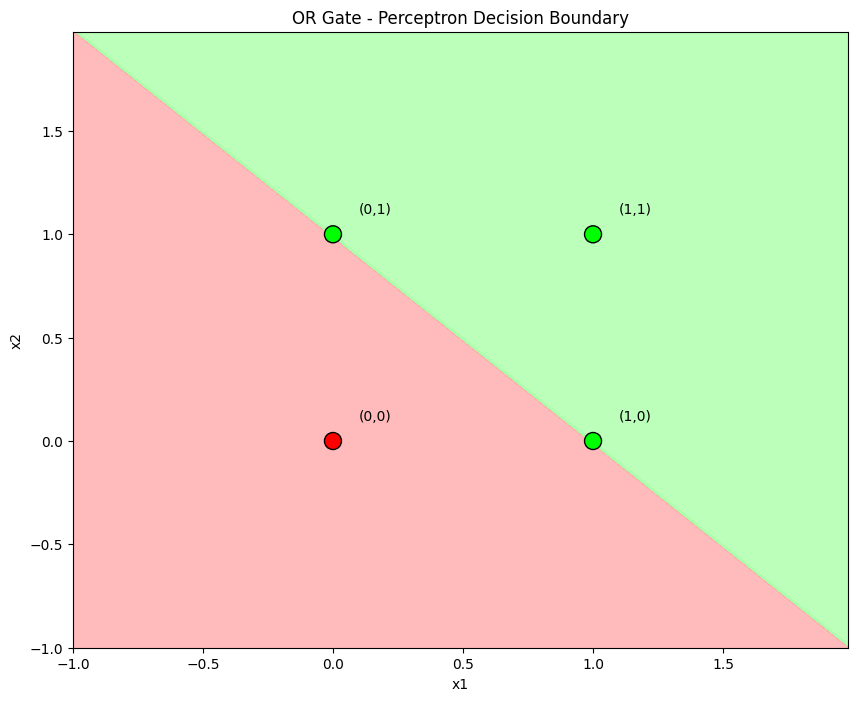

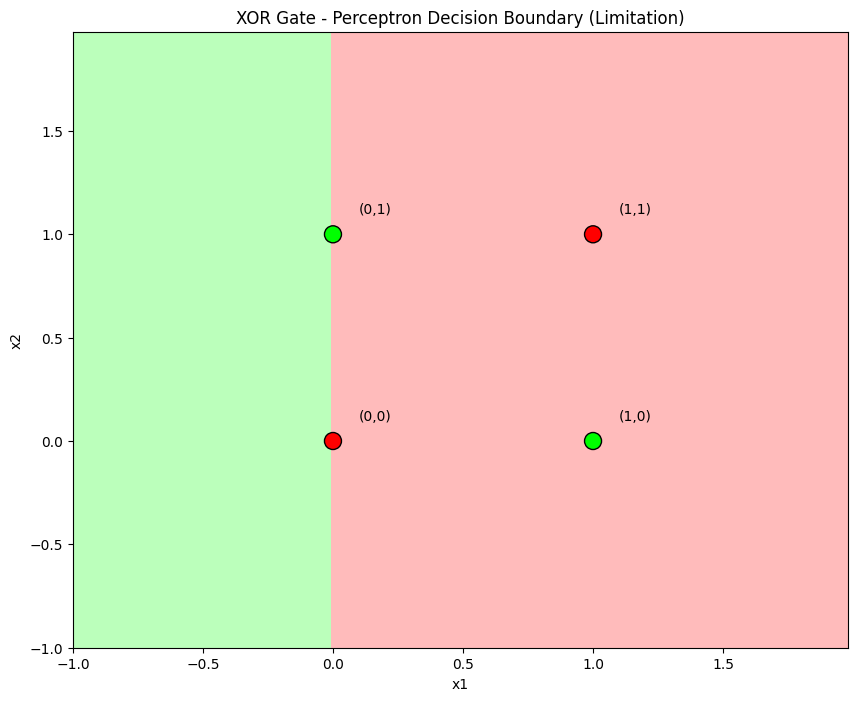

In [7]:
def plot_decision_boundary(X, y, perceptron, title):
    h = 0.02  # Step size in the mesh

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.array([perceptron.activation_function(np.dot(np.array([x1, x2]),
                                             perceptron.weights) + perceptron.bias)
                 for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00']),
                edgecolors='k', s=150)

    for i, txt in enumerate(["(0,0)", "(0,1)", "(1,0)", "(1,1)"]):
        plt.annotate(txt, (X[i, 0], X[i, 1]), xytext=(X[i, 0] + 0.1, X[i, 1] + 0.1))

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.show()


plot_decision_boundary(X_and, y_and, perceptron_and, 'AND Gate - Perceptron Decision Boundary')
plot_decision_boundary(X_or, y_or, perceptron_or, 'OR Gate - Perceptron Decision Boundary')
plot_decision_boundary(X_xor, y_xor, perceptron_xor, 'XOR Gate - Perceptron Decision Boundary (Limitation)')

## Using Perceptron on a Real Dataset: Iris

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Take first two features for visualization
y = iris.target[:100]  # Consider only two classes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the perceptron
perceptron_iris = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron_iris.fit(X_train, y_train)

# Make predictions
y_pred = perceptron_iris.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on iris dataset: {accuracy:.2f}")




Accuracy on iris dataset: 1.00


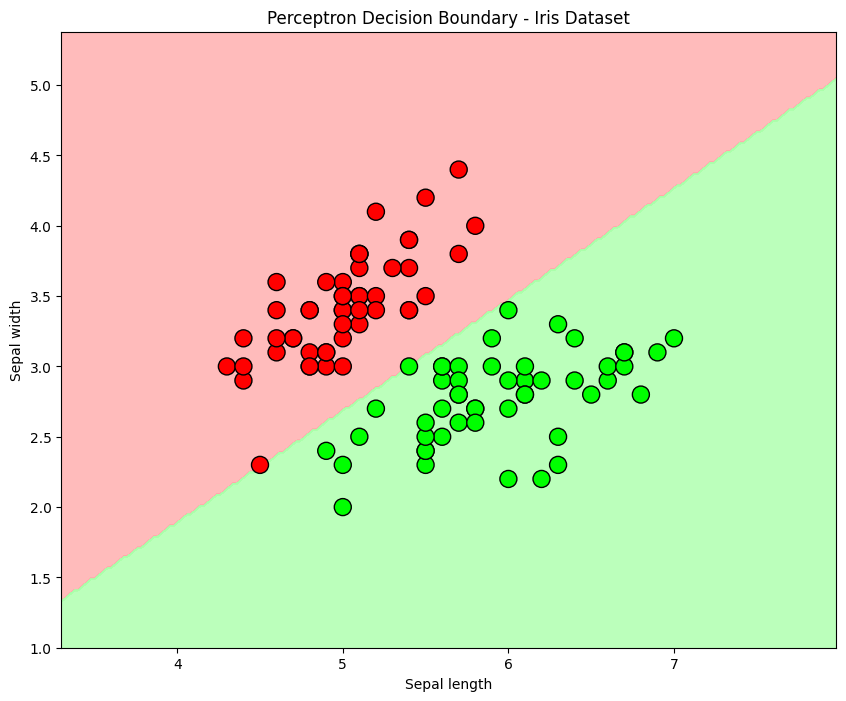

In [9]:
# Plot decision boundary
plt.figure(figsize=(10, 8))
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.array([perceptron_iris.activation_function(np.dot(np.array([x1, x2]),
                                            perceptron_iris.weights) + perceptron_iris.bias)
             for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00']),
            edgecolors='k', s=150)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Perceptron Decision Boundary - Iris Dataset')
plt.show()



In [10]:
from sklearn.linear_model import Perceptron as SKPerceptron

# Create and train the perceptron
sk_perceptron = SKPerceptron(max_iter=1000, tol=1e-3, random_state=42)
sk_perceptron.fit(X_train, y_train)

# Make predictions
y_pred_sk = sk_perceptron.predict(X_test)

# Calculate accuracy
accuracy_sk = accuracy_score(y_test, y_pred_sk)
print(f"Accuracy using scikit-learn's perceptron: {accuracy_sk:.2f}")



Accuracy using scikit-learn's perceptron: 0.95


## Understanding Perceptron Limitations

The perceptron has several limitations:

1. **Linearly Separable Problems Only**: The perceptron can only learn linearly separable problems. This is why it fails on XOR, which requires a non-linear decision boundary.

2. **No Probability Output**: It outputs only 0 or 1, not a probability.

3. **Sensitive to Feature Scaling**: It performs better when the features are on similar scales.


In [11]:
# Demonstrating XOR problem solution with two perceptrons
def xor_with_two_perceptrons():
    # First perceptron (detects when both inputs are 1)
    perceptron1 = Perceptron(learning_rate=0.1, n_iterations=100)
    perceptron1.fit(X_and, y_and)

    # Second perceptron (detects when at least one input is 1)
    perceptron2 = Perceptron(learning_rate=0.1, n_iterations=100)
    perceptron2.fit(X_or, y_or)

    # Combine outputs: (A OR B) AND NOT(A AND B)
    outputs = []
    for i in range(len(X_xor)):
        or_output = perceptron2.predict([X_xor[i]])[0]
        and_output = perceptron1.predict([X_xor[i]])[0]
        final_output = 1 if or_output == 1 and and_output == 0 else 0
        outputs.append(final_output)

    print("\nXOR using combination of perceptrons:")
    print("Predictions:", outputs)
    print("Expected:", y_xor)

# Run the demonstration
xor_with_two_perceptrons()





XOR using combination of perceptrons:
Predictions: [0, 1, 1, 0]
Expected: [0 1 1 0]


## Multi-Layer Perceptron (Briefly)

The limitations of a single perceptron can be overcome by combining multiple perceptrons in layers - this is how we get to neural networks!



In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple MLP for XOR
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')             # Output layer
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_xor, y_xor, epochs=1000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_xor, y_xor, verbose=0)
print(f"\nMLP accuracy on XOR: {accuracy:.2f}")

# Make predictions
y_pred_mlp = (model.predict(X_xor) > 0.5).astype("int32")
print("XOR predictions with MLP:", y_pred_mlp.flatten())
print("Expected:", y_xor)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



MLP accuracy on XOR: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
XOR predictions with MLP: [0 1 1 0]
Expected: [0 1 1 0]
